Intro to Tensorflow
---

Import tensorflow and other needed libraries here:

In [3]:
# TODO: Add imports.
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

Clear the Graph
---
Clear the default graph to reset everything back to default

In [4]:
# TODO: Clear the tensorflow graph
tf.reset_default_graph()

Set up Placeholders
---
Placeholders are places you can feed data into your model. They indicate a value that you'll feed in later when the network is run.

Shape is just how many elements can fit on the spot [x ,or y] none means anything will do

In [5]:
# TODO: Create placeholders

Variables
---
Variables keep their value between runs. These are the building blocks of machine learning, and represent the parameters that will be tuned as your model trains

In [6]:
# TODO: Create variables
tf.reset_default_graph()

inputData = tf.placeholder(dtype=tf.float32, shape=None)
outputData = tf.placeholder(dtype=tf.float32, shape=None)

slope = tf.Variable(0, dtype=tf.float32)
intercept = tf.Variable(1, dtype=tf.float32)
#^This is basicly y intercept with a slop of rise over run
model_operation = slope * inputData + intercept
error = model_operation - outputData
squaredError = tf.square(error)
loss = tf.reduce_mean(squaredError)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.005)
#^one of the machine learning functions that improve estimation over time
train = optimizer.minimize(loss)

Running a Session
---
Once your graph is built, you can start a session. Putting the session in a `with` statement allows the session to automatically close once the statement finishes:
```
with tf.Session() as sess:
    # Run the session in here
    ...
# Session closes when you get here
```

[0.121999994, 1.04]
[1.8820356, 1.416124]
[1.9395611, 1.2573712]
[1.9810126, 1.1392077]
[2.0117533, 1.0515718]
[2.0345526, 0.9865773]
[2.0514612, 0.93837386]


[2.0640013, 0.9026244]
[2.0733008, 0.8761111]
[2.0801995, 0.8564475]
[2.0853148, 0.841864]
[2.089109, 0.8310483]
[2.0919228, 0.8230268]


[2.0940094, 0.8170776]
[2.095557, 0.81266576]
[2.0967047, 0.80939364]
[2.097556, 0.80696696]
[2.0981872, 0.8051671]
[2.0986552, 0.8038326]
[2.0990028, 0.8028428]
0.3800015


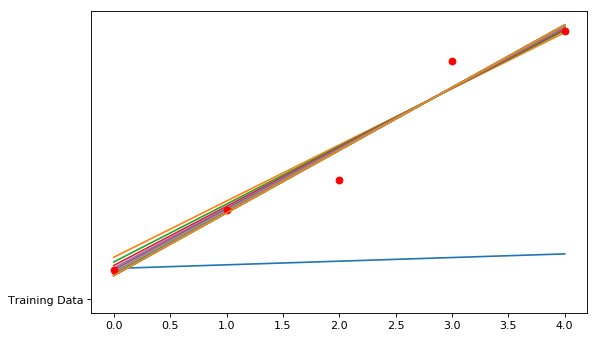

In [7]:
# TODO: Run a session

init = tf.global_variables_initializer()
#^^ that function is important if you want to reset variables
#for trainable models

xValues = [0,1,2,3,4]
yValues = [1,3,4,8,9]
#^Input variables
plt.figure(figsize=(8,5), dpi=80)
#^Graph properties
with tf.Session() as sess:
    sess.run(init)
    for i in range(2000):
        sess.run(train, feed_dict={inputData: xValues, outputData: yValues})
        if i % 100 == 0:
            print(sess.run([slope, intercept]))
            plt.plot(xValues, sess.run(model_operation, feed_dict={inputData: xValues}))
            #^Plot the points
    print(sess.run(loss, feed_dict={inputData: xValues, outputData: yValues}))
    plt.plot(xValues, yValues, 'ro', 'Training Data')
    plt.plot(xValues, sess.run(model_operation,  feed_dict={inputData: xValues}))
    plt.show()

Neurons and Neural Networks
---
Tensorflow provides functions to easily create layers of neurons for a neural network.